<a href="https://colab.research.google.com/github/harnalashok/CatEncodersFamily/blob/main/quick_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## quick_sample


In [ ]:
# Last amended: 20th July, 2023

## Basics

In [12]:
!pip install catencfamily==0.0.87
!pip install igraph
!pip install install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.9 MB/s eta 0:00:00


In [4]:
# 1.0 Call libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from catencfamily.encoders import CatEncodersFamily
from catencfamily import utils
import cdlib
from cdlib import algorithms

In [5]:
# 2.0
data = pd.DataFrame(
                     {
                      "xa" : ['a', 'b', 'c', 'b', 'c', 'd','d','d','e'],
                      "xb" : ['t','t','t','u','v','v','w','z','z'],
                      "xc" : [1.2,2.3,3.2,4.5,0.1,0.8,6.7,3.4, 1.1]
                     }
                    )
data

,xa,xb,xc
0,a,t,1.2
1,b,t,2.3
2,c,t,3.2
3,b,u,4.5
4,c,v,0.1
5,d,v,0.8
6,d,w,6.7
7,d,z,3.4
8,e,z,1.1


In [ ]:
# 2.1 Read breastcancer Data:

#data = pd.read_csv("/content/sample_data/demo_sample.csv")
#data

,xa,xb,xc
0,a,t,1.30
1,b,t,2.40
2,c,t,1.15
3,b,u,2.09
4,c,v,2.10
5,d,v,3.10
6,d,w,2.70
7,d,z,1.90
8,e,z,0.12


## Instantiation and fitting

In [6]:
# 3.0 Instantiate and fit CatEncodersFamily class:

cat_cols = ['xa', 'xb']
interactingCatCols = cat_cols
ct = CatEncodersFamily(
                       cMeasures=[1,1,1,1,None,1,1],
                       saveGraph = True,
                       cutoff = 2
                       )

# 3.1 Fit it


ct.fit(data, cat_cols, interactingCatCols)

Folder  /content/allmodels/models created to deposit cat encoder models and graph related files
Record set no is 1  
Set of records is:  [('xa', 'xb', [1, 1, 1, 1, None, 1, 1]), ('xa', 'xa_p_xb', [1, 1, 1, 1, None, 1, 1]), ('xb', 'xa', [1, 1, 1, 1, None, 1, 1]), ('xb', 'xa_p_xb', [1, 1, 1, 1, None, 1, 1])]



Next:  1  of  4 xa xb
No of unique values in  xa  are:  5
Bipartite Network created. Time taken:  0.00014715989430745443 minutes
Bipartite Network projected. Time taken:  3.2055377960205075e-05 minutes
Calculating betweenness centrality with k = All nodes
Betweenness centrality calculated
Model extracted. Time taken:  0.003912476698557535 minutes
Model saved
Done with xa  and  xb
Time taken:  0.004295782248179118
Entry made in file progress.csv



Next:  2  of  4 xa xa_p_xb
No of unique values in  xa  are:  5
Bipartite Network created. Time taken:  5.772511164347331e-05 minutes
Bipartite Network projected. Time taken:  2.1183490753173827e-05 minutes
Calculating betweenness central

CatEncodersFamily(cMeasures=[1, 1, 1, 1, None, 1, 1], cutoff=2,
                  modelsPath=PosixPath('/content/allmodels/models'),
                  pathToStoreProgress=PosixPath('/content/allmodels/progress'),
                  saveGraph=True)

## Data transformation:

In [7]:
# 4.0 Transform data now:

data_trans= ct.transform(data[cat_cols])

f"Transformed train data shape: {data.shape}"



====Reading all model-dicts from RAM


====All saved model-dicts read! Model files are intact!
====Total model-dict are:  20
====Sending model loading progress to file: /content/allmodels/progress/load_stored_models.txt
When loading is in progress, open this file with notepad++ AND NOT with notepad


Current mem usage is: 0.00108 MB
Mem usage after dtype transformation is: 0.000648 MB


'Transformed train data shape: (9, 3)'

Our new features are substantially difft from original features. Prefixes to feature names imply as below:
<i>
>deg_ ===> This feature results from calculation of degree centrality<br>
>eig_ ===> This feature results from calculation of eigenvector centrality<br>
>pr_  ===> This feature results from calculation of page rank centrality<br>
>bet_ ===> This feature results from calculation of betweenness centrality<br>
>clu_ ===> This feature results from calculation of clustering characteristics<br>,</i>


In [8]:
# 4.1 Observe data now:
#     It also has original binned cols (5):

data_trans

,xa,xb,deg_xa_ck_xb,eig_xa_ck_xb,pr_xa_ck_xb,clu_xa_ck_xb,bet_xa_ck_xb,eig_xa_ck_xa_p_xb,deg_xb_ck_xa,eig_xb_ck_xa,pr_xb_ck_xa,clu_xb_ck_xa,bet_xb_ck_xa,eig_xb_ck_xa_p_xb
0,a,t,0.50,0.497154,0.191822,1.000000,0.000000,0.675846,0.50,0.342485,0.212600,0.000000,0.500000,0.622994
1,b,t,0.50,0.497154,0.191822,1.000000,0.000000,0.391480,0.50,0.342485,0.212600,0.000000,0.500000,0.622994
2,c,t,0.75,0.603704,0.283402,0.333333,0.666667,-0.543612,0.50,0.342485,0.212600,0.000000,0.500000,0.622994
3,b,u,0.50,0.497154,0.191822,1.000000,0.000000,0.391480,0.25,0.154668,0.120354,0.000000,0.000000,0.172585
4,c,v,0.75,0.603704,0.283402,0.333333,0.666667,-0.543612,0.75,0.603704,0.283402,0.333333,0.666667,0.350273
5,d,v,0.50,0.342485,0.212600,0.000000,0.500000,0.130477,0.75,0.603704,0.283402,0.333333,0.666667,0.350273
6,d,w,0.50,0.342485,0.212600,0.000000,0.500000,0.130477,0.50,0.497154,0.191822,1.000000,0.000000,0.582039
7,d,z,0.50,0.342485,0.212600,0.000000,0.500000,0.130477,0.50,0.497154,0.191822,1.000000,0.000000,0.347321
8,e,z,0.25,0.154668,0.120354,0.000000,0.000000,-0.278275,0.50,0.497154,0.191822,1.000000,0.000000,0.347321


## Graphs

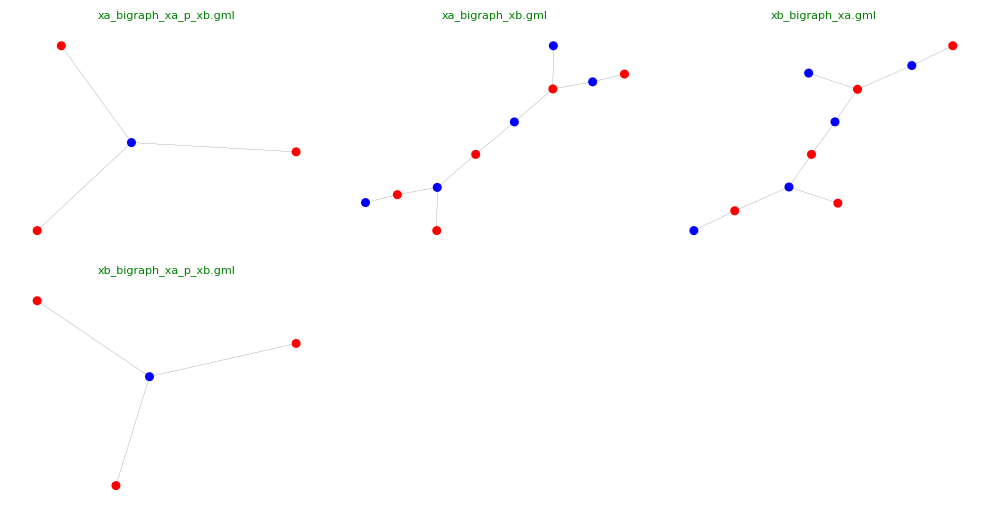

In [9]:
# 5.1 Plot of sample bigraphs:
bigraphs = ['xa_bigraph_xa_p_xb.gml', 'xa_bigraph_xb.gml', 'xb_bigraph_xa.gml', 'xb_bigraph_xa_p_xb.gml']
plt.style.use('default')
pathToFolder = Path("/content/allmodels/models")
pos = 1
fig = plt.figure(figsize=(10,18));
for bi in bigraphs:
    ax = fig.add_subplot(7,3,pos);
    pos = pos + 1
    # Only show connedted nodes
    _=utils.plotBipartiteGraph(bi,
                               pathToFolder,
                               ax = ax,
                               title = bi,
                               connected = True);
    plt.tight_layout();

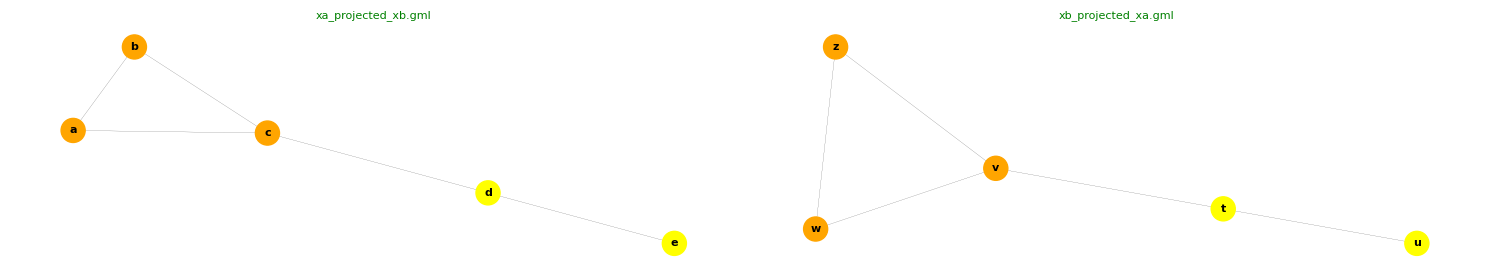

In [10]:
# 5.2 Plot of  projected graph files
projected = [ 'xa_projected_xb.gml', 'xb_projected_xa.gml']
plt.style.use('default')
pos = 1
fig = plt.figure(figsize=(15,18));
for prj in projected:
    ax = fig.add_subplot(7,2,pos);
    pos = pos + 1
    # Only show connected nodes
    _=utils.communityVisualization(prj,
                                   pathToFolder,
                                   ax = ax,
                                   withLabels = True,
                                   title = prj);
    plt.tight_layout();

TypeError: ignored

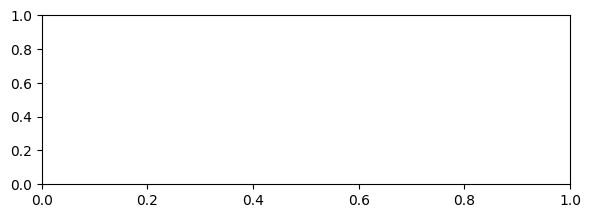

In [13]:
# 5.2 Plot of  projected graph files
projected = [ 'xa_projected_xb.gml', 'xb_projected_xa.gml']
plt.style.use('default')
pos = 1
fig = plt.figure(figsize=(15,18));
for prj in projected:
    ax = fig.add_subplot(7,2,pos);
    pos = pos + 1
    # Only show connected nodes
    _=communityVisualization(prj,
                                   pathToFolder,
                                   ax = ax,
                                   algo = algorithms.leiden,
                                   withLabels = True,
                                   title = prj);
    plt.tight_layout();

In [14]:
import networkx as nx
from cdlib import algorithms
import networkx as nx
G = nx.karate_club_graph()
coms = algorithms.leiden(G)

In [28]:
def communityVisualization(filename, pathToFolder, algo = nx.community.greedy_modularity_communities ,
                           ax= None, title = None, withLabels = False, font_size = 8, edgewidth = 0.1,
                           node_size = None, k = None, colorList =  ["orange","yellow","cyan","green","red", "purple"]*20,
                           takeGraphSample = False, noSampleNodes=100):
    """
    Desc
    ----
    Displays communities created by given community algo.

    Parameters
    ----------
    filename : str, Graph file
    pathToFolder : str, Path to folder having graph files
    algo: function object to create communities
          Default: nx.community.greedy_modularity_communities
          Examples: nx.community.kernighan_lin_bisection
                    nx.community.greedy_modularity_communities
                    nx.community.louvain_communities
    ax: Matplotlib axis object
    withLabels : boolean, Should labels be displayed? The default is False.
    font_size : int, Label font size. The default is 8.
    edgewidth: float, Edge line width
    node_size: int
    k: float; optimal distance between nodes.
    colorList: List of colors for difft communitied.
               Default is: ["orange","yellow","cyan","green","red","purple"]*20

    Returns
    -------
    None.

    """
    filepath = pathToFolder / filename
    G = nx.read_gml(filepath)
    if (len(G.edges())) == 0:
        print("This network has no edges. Moving ahead.")
        return


    # If network is very large, take a sanple
    # Ref: https://stackoverflow.com/a/62407941/3282777
    if takeGraphSample:
        sampled_nodes = np.random.choice(G.nodes, noSampleNodes)
        G = G.subgraph(sampled_nodes)
        if (len(G.edges())) == 0:
            print("This network has no edges. Moving ahead.")
            return

    colors = colorList
    pos = nx.spring_layout(G, k)

    if algo == nx.community.girvan_newman:
        lst_b = algo(G)
        lst_b = tuple(sorted(c) for c in next(lst_b))
        lst_b = [frozenset(i) for i in lst_b ]

    if algo ==  algorithms.leiden:
        lst_b = algo(G)
        #lst_b = tuple(sorted(c) for c in next(lst_b.communities))
        lst_b = [frozenset(i) for i in lst_b.communities ]
        print(lst_b)
    else:
        lst_b = algo(G)


    color_map_b = {}
    keys = G.nodes()
    values = "black"
    for i in keys:
            color_map_b[i] = values
    counter = 0
    for x in lst_b:
      for n in x:
        color_map_b[n] = colorList[counter]
      counter = counter + 1
    nx.draw_networkx_edges(G, pos, width = edgewidth, ax =ax);

    if node_size is not None:
        nx.draw_networkx_nodes(G, pos, node_size = node_size, node_color=dict(color_map_b).values(), ax =ax);
    else:
        nx.draw_networkx_nodes(G, pos,  node_color=dict(color_map_b).values(), ax =ax);
    if withLabels:
      nx.draw_networkx_labels(G, pos, font_size = font_size, font_weight = 'bold',ax =ax)
    plt.axis("off");

    fontx = {'color':'green','size':8}
    plt.title(title, fontdict = fontx);

    #plt.show();



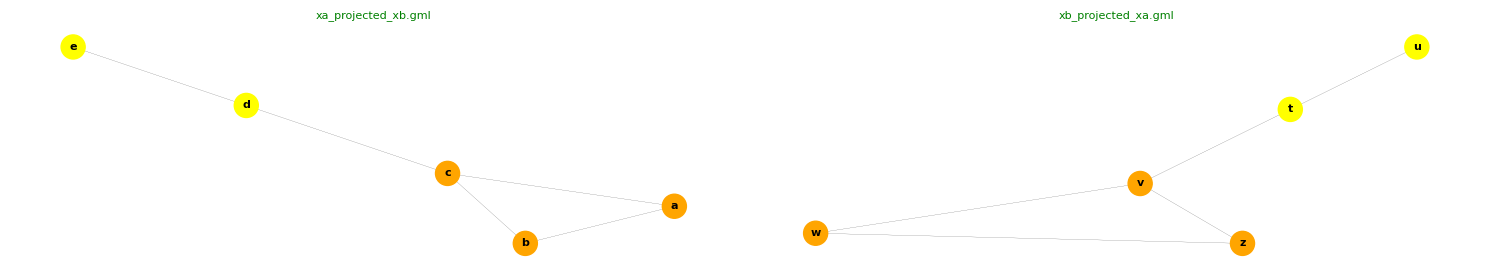

In [30]:
# 5.2 Plot of  projected graph files
projected = [ 'xa_projected_xb.gml', 'xb_projected_xa.gml']
plt.style.use('default')
pos = 1
fig = plt.figure(figsize=(15,18));
for prj in projected:
    ax = fig.add_subplot(7,2,pos);
    pos = pos + 1
    # Only show connected nodes
    _=communityVisualization(prj,
                                   pathToFolder,
                                   ax = ax,
                                   algo = algorithms.leiden,
                                   withLabels = True,
                                   title = prj);
    plt.tight_layout();

In [15]:
coms.communities

[[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33],
 [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21],
 [23, 24, 25, 27, 28, 31],
 [4, 5, 6, 10, 16]]

In [ ]:
##################### DONE ####################